# UIUC Fuel Demand

* On campus/off campus
* MTD busses
* Various fuel types

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize']=(12,9)
plt.rcParams['font.size'] = '16'
plt.style.use('ggplot')

In [2]:
total = pd.read_csv('../2019grossfueldata.csv')
total

,Location,unleaded (gallons),diesel (gallons),E85 (gallons)
0,On Campus,249891,96896,25268
1,Off Campus,158822,19932,459
2,Total,408713,116828,25727


In [3]:
total['total (gallons)'] = (total['unleaded (gallons)'] + 
                            total['diesel (gallons)']/1.155 + 
                            total['E85 (gallons)']/0.734)

In [4]:
total

,Location,unleaded (gallons),diesel (gallons),E85 (gallons),total (gallons)
0,On Campus,249891,96896,25268,368208.708813
1,Off Campus,158822,19932,459,176704.483457
2,Total,408713,116828,25727,544913.192269


In [5]:
uiuc_df = pd.read_csv('../uiuc.csv', usecols=['unleaded (gallons)', 'E85 (gallons)', 'diesel (gallons)'])
dates = pd.date_range(start='1-1-2019',end='12-31-2019', freq='D')
uiuc_df.index = dates

In [6]:
uiuc_df

,unleaded (gallons),diesel (gallons),E85 (gallons)
2019-01-01,0.00,0.0,0.0
2019-01-02,263.10,82.3,50.2
2019-01-03,461.81,34.2,79.8
2019-01-04,394.49,16.1,136.1
2019-01-05,7.40,0.0,0.0
...,...,...,...
2019-12-27,89.80,39.6,50.0
2019-12-28,0.00,0.0,0.0
2019-12-29,0.00,0.0,0.0
2019-12-30,140.00,31.7,65.2


(0, 900)

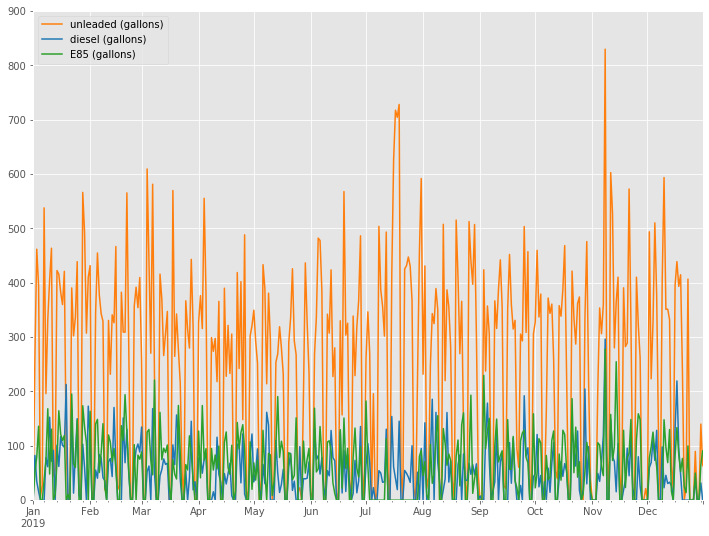

In [7]:
uiuc_df.plot(color=['tab:orange','tab:blue','tab:green'])
plt.ylim(0,900)

In [8]:
uiuc_df['total (gallons)'] = (uiuc_df['unleaded (gallons)'] + 
                              uiuc_df['diesel (gallons)']/1.155 + 
                              uiuc_df['E85 (gallons)']/0.734)

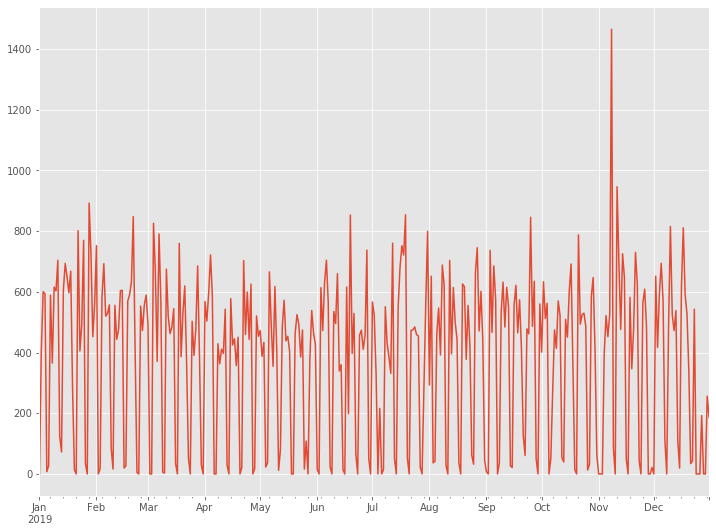

In [9]:
uiuc_df['total (gallons)'].plot()
# plt.ylim(0,900)

In [10]:
spring_mask = (uiuc_df.index.month >= 3) & (uiuc_df.index.month <= 5) 
summer_mask = (uiuc_df.index.month >= 6) & (uiuc_df.index.month <= 8)
fall_mask = (uiuc_df.index.month >= 9) & (uiuc_df.index.month <= 11) 
winter_mask = (uiuc_df.index.month == 12) | (uiuc_df.index.month == 1) | (uiuc_df.index.month == 2) 
seasons = {'spring':spring_mask,
           'summer':summer_mask,
           'fall':fall_mask,
           'winter':winter_mask}

In [11]:
uiuc_df[spring_mask]['unleaded (gallons)'].sum()/uiuc_df['unleaded (gallons)'].sum()/24

0.009811555126510675

In [13]:
uiuc_df[spring_mask]['diesel (gallons)'].sum()/uiuc_df['diesel (gallons)'].sum()/24

0.009810282817473233

In [49]:
uiuc_df['total (gallons)'].sum()

138111.8117455796

In [14]:
mtd_df = pd.read_csv('../mtd.csv', usecols=['quantity (gallons)'])
# dates = pd.date_range(start='1-1-2019',end='12-31-2019', freq='D')
mtd_df.index = dates
mtd_df

,quantity (gallons)
2019-01-01,476.4
2019-01-02,884.3
2019-01-03,1907.3
2019-01-04,1872.5
2019-01-05,2030.5
...,...
2019-12-27,2015.3
2019-12-28,0.0
2019-12-29,2079.1
2019-12-30,2157.2


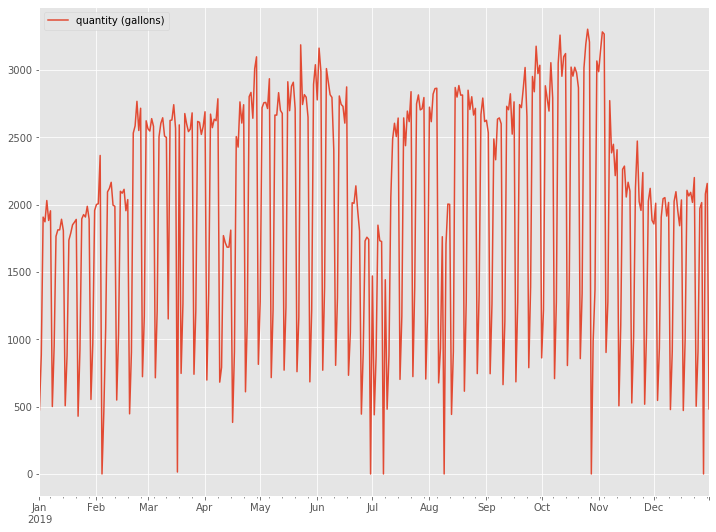

In [15]:
mtd_df.plot()

In [39]:
fleet_df = pd.read_csv('../fuel_data.csv')

In [40]:
split_str = lambda string: string.split(' ')[2]

In [41]:
fleet_df['vcltype'] = fleet_df['Description'].apply(split_str)

In [42]:
np.unique(fleet_df['Asset']).size

298

In [43]:
vcl_groups = fleet_df.groupby(fleet_df['Asset'])
len(vcl_groups.groups)

298

In [44]:
vcl_counts = {'UNLEADED':0.0,'E85':0.0, 'DIESEL':0.0}

for group in vcl_groups.groups:
    data = vcl_groups.get_group(group)
    data = data['vcltype']
    if 'E85' in np.unique(data):
        vcl_counts['E85'] += 1
    elif 'DIESEL' in np.unique(data):
        vcl_counts['DIESEL'] += 1
    elif 'UNLEADED' in np.unique(data):
        vcl_counts['UNLEADED'] += 1


In [45]:
vcl_counts

{'UNLEADED': 207.0, 'E85': 54.0, 'DIESEL': 37.0}

In [46]:
avg_eff = (207 + 0.734*54 + 37*1.155)/298
avg_eff

0.9710436241610738